In [3]:
x_max = 548
y_max = 421
weather = {}
for mod in range(1,11):
    weather_day = {}
    for n in range(6,11):
        weather_hour = {}
        for h in range(3, 21):
            wind_color = np.zeros([x_max, y_max])
            day_n= real_weather.loc[(real_weather.date_id==n)&(real_weather.hour==h)&(real_weather.model==mod)]
            for index, item in day_n.iterrows():
                wind_color[int(item['xid'])-1][int(item['yid'])-1] = item['wind']
                weather_hour[str(h)] = wind_color 
        weather_day[str(n)] = weather_hour
    weather[str(mod)] = weather_day
import pickle
f1 = open('weather_map_all.pkl', 'wb')
pickle.dump(weather,f1)
f1.close()

In [46]:
import pickle
output_weather = open('layer_1_output_prob.pkl', 'rb')
output_weather = pickle.load(output_weather)

In [47]:
import numpy as np
import pickle
gy = np.load('02_07p.npy')

In [48]:
import numpy as np
import pickle
x_max = 548
y_max = 421
for d in range(1,6):
    for h in range(3,21):
        for x in range(x_max):
            for y in range(y_max):
                output_weather[str(d)][str(h)][x][y] = gy[d-1,h-3,x,y]
f1 = open('weather_guanyang.pkl', 'wb')
pickle.dump(output_weather,f1)
f1.close()

In [9]:
output_weather[str(d)][str(h)]

array([[ 0.9999783 ,  0.99998784,  0.9999944 , ...,  0.99416566,
         0.99848276,  0.99954826],
       [ 0.99999475,  0.99999714,  0.99999905, ...,  0.99470371,
         0.99546295,  0.99964809],
       [ 0.99951661,  0.99993682,  0.99998891, ...,  0.99872166,
         0.99864703,  0.99953532],
       ..., 
       [ 0.74019593,  0.18958341,  0.31172663, ...,  0.99999917,
         0.99999356,  0.99999928],
       [ 0.60786682,  0.27407455,  0.23487027, ...,  0.99999928,
         0.9999994 ,  0.99999917],
       [ 0.83216703,  0.49842143,  0.5133006 , ...,  0.9999975 ,
         0.99999511,  0.99999905]])

In [7]:
real_weather[real_weather['rainfall'].isnull()]

,xid,yid,date_id,hour,model,wind,rainfall


In [3]:
import pandas as pd
real_weather_name = 'ForecastDataforTesting_201802.csv'

real_weather = pd.read_csv(real_weather_name,nrows=5)
print(real_weather)

   xid  yid  date_id  hour  model  wind  rainfall
0    1    1        6     3      1  5.87         0
1    1    1        6     3      2  2.91         0
2    1    1        6     3      3  7.51         0
3    1    1        6     3      4  6.92         0
4    1    1        6     3      5  4.37         0


                xid          yid      date_id         hour        model  \
count  2.076372e+08  207637200.0  207637200.0  207637200.0  207637200.0   
mean            NaN          NaN          NaN          NaN          NaN   
std             NaN          NaN          0.0          0.0          0.0   
min    1.000000e+00          1.0          6.0          3.0          1.0   
25%    1.377500e+02        106.0          7.0          7.0          3.0   
50%    2.745000e+02        211.0          8.0         11.5          5.5   
75%    4.112500e+02        316.0          9.0         16.0          8.0   
max    5.480000e+02        421.0         10.0         20.0         10.0   

               wind      rainfall  
count  2.076372e+08  2.076372e+08  
mean            NaN           NaN  
std    0.000000e+00           NaN  
min    0.000000e+00  0.000000e+00  
25%    7.738281e+00  0.000000e+00  
50%    1.070312e+01  1.000214e-02  
75%    1.420312e+01  7.998047e-01  
max    3.840625e+01  2.680000e+02  


100%|██████████| 10/10 [00:00<00:00, 90.75it/s]
207637200it [5:54:34, 9759.93it/s]


In [ ]:
import pickle
import numpy as np
file_weather = open('weather_output.pkl', 'rb')
weather = pickle.load(file_weather)
from IPython.display import HTML
fig = plt.figure()
data = np.random.random((255, 255))
n = 5
im = plt.imshow(weather[str(n)]['3'])
plt.colorbar(im, shrink=1) 
# animation function.  This is called sequentially
def animate(i):
    data = weather[str(n)][str(i+3)]
    im.set_array(data)
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=17, interval=300, blit=True)
HTML(anim.to_html5_video())
#plt.show()

#TODO:绘制天气变化图

In [2]:
# 均值法测出一版天气数据
import pickle
import numpy as np
file_weather = open('weather_map_all.pkl', 'rb')
weather_map_all = pickle.load(file_weather)
weather_map_average = {}
x_max = 548
y_max = 421
for date in range(6,11):
    weather_map_date = {}
    for h in range(3,21):
        weather_matrix = np.zeros([x_max, y_max])
        for i in range(1,11):
            weather_matrix = weather_matrix + weather_map_all[str(i)][str(date)][str(h)]
        weather_matrix = weather_matrix/10
        weather_map_date[str(h)] = weather_matrix
    weather_map_average[str(date)] = weather_map_date

import pickle
f1 = open('weather_average.pkl', 'wb')
pickle.dump(weather_map_average,f1)
f1.close()

In [6]:
weather_map_average['6']['3']

array([[  9.522,   9.638,   9.726, ...,  11.439,  11.412,  11.201],
       [  9.524,   9.612,   9.669, ...,  11.362,  11.196,  10.917],
       [  9.536,   9.634,   9.669, ...,  11.182,  10.853,  10.716],
       ..., 
       [ 19.44 ,  19.44 ,  19.46 , ...,   9.393,   9.312,   9.249],
       [ 19.35 ,  19.37 ,  19.37 , ...,   9.452,   9.407,   9.35 ],
       [ 19.32 ,  19.32 ,  19.33 , ...,   9.537,   9.477,   9.405]])

In [40]:
# 均值法测出一版测试的天气数据
import pickle
import numpy as np
from tqdm import tqdm
file_weather = open('weather_test_6_10.pkl', 'rb')
weather_map_all = pickle.load(file_weather)
weather_map_average = {}
x_max = 548
y_max = 421
for date in tqdm(range(6,11)):
    weather_map_date = {}
    for h in range(3,21):
        weather_matrix = np.zeros([x_max, y_max])
        for i in range(1,11):
            weather_matrix = weather_matrix + weather_map_all[str(i)][str(date)][str(h)][1]
        weather_matrix = weather_matrix/10
        weather_map_date[str(h)] = np.array(weather_matrix,dtype=np.float16)
    weather_map_average[str(date)] = weather_map_date

import pickle
f1 = open('weather_test_rainfall_average.pkl', 'wb')
pickle.dump(weather_map_average,f1)
f1.close()

100%|██████████| 5/5 [00:00<00:00,  6.00it/s]


In [18]:
print(weather_map_all[str(1)][str(date)][str(h)][0])
print(weather_map_all[str(2)][str(date)][str(h)][0])

[[  5.9296875    6.           5.828125   ...,   7.5          7.37109375
    7.25      ]
 [  5.828125     5.98046875   5.859375   ...,   7.5          7.37109375
    7.37890625]
 [  5.44921875   5.55078125   5.69921875 ...,   7.5          7.62890625
    7.76171875]
 ..., 
 [ 12.8984375   13.          13.1015625  ...,  14.5         14.296875
   14.296875  ]
 [ 13.1015625   13.203125    13.203125   ...,  14.5         14.296875
   14.203125  ]
 [ 13.3984375   13.296875    13.296875   ...,  14.5         14.296875
   14.203125  ]]
[[  5.859375     5.859375     5.98046875 ...,   5.51171875   5.390625
    5.51953125]
 [  5.8203125    5.87109375   5.921875   ...,   5.37890625   5.37890625
    5.62890625]
 [  6.1015625    5.94140625   5.94140625 ...,   5.26171875   5.37890625
    5.75      ]
 ..., 
 [ 16.59375     16.5         16.296875   ...,   9.1171875    9.25
    9.3828125 ]
 [ 16.296875    16.203125    16.09375    ...,   9.1171875    9.25
    9.2578125 ]
 [ 16.203125    16.09375     15.89843

In [6]:
# 求测试数据的预测准确率
file_weather = open('weather_average_input.pkl', 'rb')
weather_input = pickle.load(file_weather)
file_weather2 = open('weather_output.pkl', 'rb')
weather_output = pickle.load(file_weather2)
count_po,count_po_total = 0,0
count_ne,count_ne_total = 0,0
for d in range(1,6):
    for h in range(3,21):
        for x in range(x_max):
            for y in range(y_max):
                if weather_input[str(d)][str(h)][x][y]-15>=0 and weather_output[str(d)][str(h)][x][y]-15>=0:
                    count_ne += 1
                if weather_input[str(d)][str(h)][x][y]-15<0 and weather_output[str(d)][str(h)][x][y]-15<0:
                    count_po += 1
                if weather_output[str(d)][str(h)][x][y]-15>=0:
                    count_ne_total += 1
                else:
                    count_po_total += 1
                
print('正样本准确率',count_po/count_po_total)
print('负样本准确率',count_ne/count_ne_total)

正样本准确率 0.9567488318976379
负样本准确率 0.8574879915578776


In [8]:
###########################################
# 探索绝对正确的点和绝对错误的点 #
###########################################
import pickle
x_max = 548
y_max = 421
file_weather = open('weather_average_input.pkl', 'rb')
weather_input = pickle.load(file_weather)
file_weather2 = open('weather_output.pkl', 'rb')
weather_output = pickle.load(file_weather2)
positive = []
negative = []
for d in range(1,6):
    for h in range(3,21):
        for x in range(x_max):
            for y in range(y_max):
                # FP
                if weather_output[str(d)][str(h)][x][y]-15>=0:
                    negative.append(weather_input[str(d)][str(h)][x][y])
                else:
                    positive.append(weather_input[str(d)][str(h)][x][y])

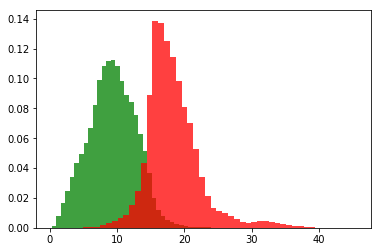

In [9]:
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(positive, 50, normed=1, facecolor='g', alpha=0.75)
n, bins, patches = plt.hist(negative, 50, normed=1, facecolor='r', alpha=0.75)
plt.show()

In [72]:
print(max(negative))
print(min(positive))

34.11
2.265


In [78]:
positive = np.array(positive)
print(len(positive[positive<5]))  
print(len(positive))

1337
5156997


In [82]:
negative = np.array(negative)
print(len(negative[negative<2.5]))
print(len(negative))

339101
15606723


In [80]:
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(positive.concat(negative), 50, normed=1, facecolor='g', alpha=0.75)
#n, bins, patches = plt.hist(negative, 50, normed=1, facecolor='r', alpha=0.75)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'concat'

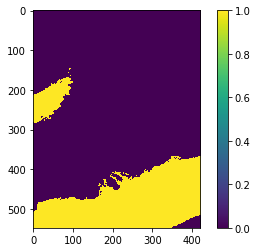

In [12]:
# 研究错分的点的分布
import copy
fig = plt.figure()
data = copy.deepcopy(weather_input[str(1)]['15'])
data[data<15] = 0
data[data>=15] = 1
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()

#TODO:绘制天气变化图

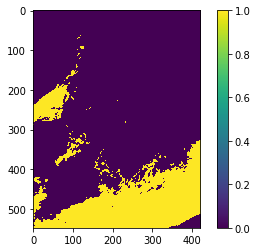

In [10]:
# 研究错分的点的分布
import copy
fig = plt.figure()
data = copy.deepcopy(weather_output[str(1)]['15'])
data[data<15] = 0
data[data>=15] = 1
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()

#TODO:绘制天气变化图

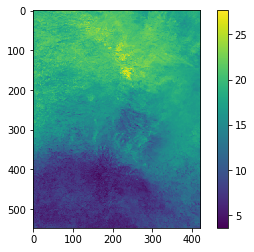

[[ 20.046875   19.78125    19.765625  ...,  19.0625     18.875      18.71875  ]
 [ 19.96875    20.03125    19.84375   ...,  18.71875    18.859375
   18.703125 ]
 [ 19.78125    19.640625   19.421875  ...,  18.46875    18.53125    18.875    ]
 ..., 
 [  9.078125    7.9296875   8.484375  ...,   8.5078125   8.078125
    8.984375 ]
 [  9.6328125   9.265625    8.796875  ...,   8.203125    7.890625    8.53125  ]
 [  9.734375    9.46875     8.625     ...,   8.359375    8.34375     8.328125 ]]


In [28]:
# 观察输出的天气数据原始文件
import pickle
import copy
import matplotlib.pyplot as plt
file_weather2 = open('lay_3_input_weather.pkl', 'rb')
#file_weather2 = open('lay_3_output.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
data = weather_output['2']['9']
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
print(data)

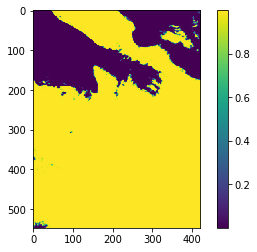

[[  2.13793592e-05   2.31005615e-05   7.72374096e-06 ...,   7.90735632e-02
    1.28716320e-01   1.19585700e-01]
 [  4.77342401e-05   1.68514434e-05   1.05709960e-05 ...,   7.62718841e-02
    8.50940868e-02   3.20697278e-02]
 [  2.03059008e-05   3.10649521e-05   7.56746385e-06 ...,   2.55419370e-02
    4.29728329e-02   8.50151181e-02]
 ..., 
 [  8.54002178e-01   7.77988613e-01   4.61002052e-01 ...,   9.99986649e-01
    9.99976873e-01   9.99951482e-01]
 [  9.23869431e-01   7.73916066e-01   6.24490976e-01 ...,   9.99984980e-01
    9.99976873e-01   9.99957204e-01]
 [  9.60496783e-01   8.15212131e-01   5.89742243e-01 ...,   9.99982476e-01
    9.99981165e-01   9.99951124e-01]]


In [54]:
# 观察输出的天气数据原始文件
import pickle
import copy
import matplotlib.pyplot as plt
#file_weather2 = open('lay_3_input_weather.pkl', 'rb')
file_weather2 = open('layer_3_output.pkl', 'rb')
#file_weather2 = open('layer_3_output_gbm.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
data = weather_output['3']['6']
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
print(data)

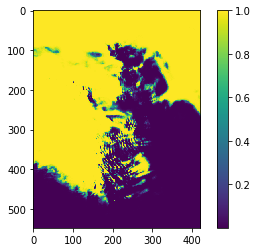

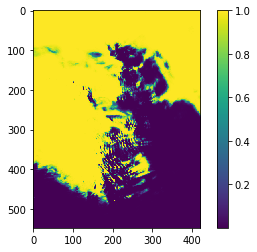

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   9.99511719e-01
    9.99511719e-01   9.99511719e-01]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   9.99511719e-01
    9.99511719e-01   9.99511719e-01]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   9.99511719e-01
    9.99511719e-01   9.99511719e-01]
 ..., 
 [  1.82628632e-04   1.21712685e-04   1.57475471e-04 ...,   1.53183937e-05
    1.63912773e-05   1.38878822e-05]
 [  2.20656395e-04   1.30176544e-04   1.39355659e-04 ...,   1.20997429e-05
    1.77025795e-05   1.41263008e-05]
 [  3.62396240e-04   2.68220901e-04   2.28643417e-04 ...,   1.26361847e-05
    1.25765800e-05   1.35898590e-05]]


In [62]:
# 观察输出的天气数据原始文件
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
#file_weather2 = open('lay_3_input_weather.pkl', 'rb')
file_weather2 = open('layer_1_output_prob_v2.pkl', 'rb')
#file_weather2 = open('layer_2_gbm_input.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
day = 1
h = 3
data = weather_output[str(day)][str(h)].astype(np.float32)
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
file_weather2 = open('layer_1_output_prob_final.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
data = weather_output[str(day)][str(h)].astype(np.float32)
#data[data>=15]=100
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
print(data)


In [29]:
file_weather = open('weather_train_1_5.pkl', 'rb')
weather_map_all = pickle.load(file_weather)
print(weather_map_all['2'][day][str(h)][0,500,100])

24.094


In [3]:
weather_output[day][str(h)][0,200,200]

9.0391

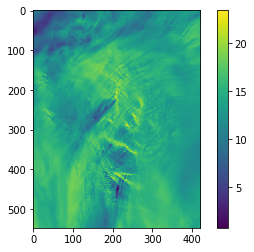

[[  9.966   9.973   9.951 ...,  13.46   13.42   13.34 ]
 [  9.944   9.915   9.949 ...,  13.3    13.16   13.11 ]
 [  9.961   9.973   9.969 ...,  12.89   12.81   12.85 ]
 ..., 
 [ 18.68   18.6    18.48  ...,  14.01   14.08   14.12 ]
 [ 18.73   18.61   18.5   ...,  14.04   14.07   14.12 ]
 [ 18.73   18.63   18.52  ...,  14.02   14.05   14.15 ]]


In [4]:
# 观察输出的天气数据原始文件
import pickle
import copy
import matplotlib.pyplot as plt
file_weather2 = open('weather_average.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
data = weather_output['6']['4']
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
print(data)

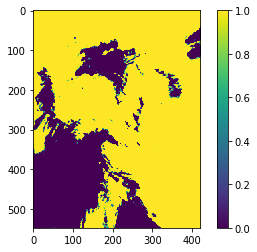

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  4.76837158e-07   1.78813934e-07   4.76837158e-07 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  3.57627869e-07   3.57627869e-07   5.96046448e-08 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  5.96046448e-08   1.19209290e-07   5.96046448e-08 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [5]:
import pickle
import copy
import matplotlib.pyplot as plt
file_weather2 = open('lay_3_output.pkl', 'rb')
weather_output = pickle.load(file_weather2)
fig = plt.figure()
data = weather_output['1']['3']
im = plt.imshow(data)
plt.colorbar(im, shrink=1) 
plt.show()
print(data)

In [7]:
count = 0
for i in range(548):
    for j in range(421):
        if data[i][j]>=15:
            count+=1
print(count)

65796


In [10]:
data[165][34]

17.3125

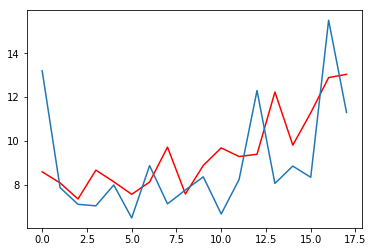

In [5]:
# 研究天气随时间变化情况
import matplotlib.pyplot as plt
import pickle
x_max = 548
y_max = 421
file_weather = open('weather_average_input.pkl', 'rb')
weather_input = pickle.load(file_weather)
file_weather2 = open('weather_output.pkl', 'rb')
weather_output = pickle.load(file_weather2)
ave = []
real = []
day = 3
x = 13
y = 200
for h in range(3,21):
    ave.append(weather_input[str(day)][str(h)][x][y])
    real.append(weather_output[str(day)][str(h)][x][y])
plt.plot(ave,color='r')
plt.plot(real)
plt.show()

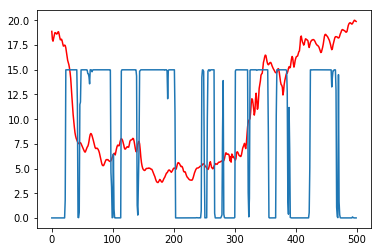

In [44]:
# 研究天气随位置变化情况
import matplotlib.pyplot as plt
import pickle
x_max = 548
y_max = 421
file_weather = open('weather_average_input.pkl', 'rb')
weather_input = pickle.load(file_weather)
#file_weather2 = open('weather_output.pkl', 'rb')
file_weather2 = open('lay_3_output.pkl', 'rb')

weather_output = pickle.load(file_weather2)
ave = []
real = []
day = 2
h=4
y = 300
for x in range(0,500):
    ave.append(weather_input[str(day)][str(h)][x][y])
    real.append(weather_output[str(day)][str(h)][x][y]*15)
plt.plot(ave,color='r')
plt.plot(real)
plt.show()

In [32]:
###########################################
# 开始研究输出结果 #
###########################################
def cal_ave_value(day,points,weather_map):
    n = len(points)-1
    prob = 1
    for item in points:
        prob = prob*weather_map[str(day-5)][str(item[2])][item[0]-1][item[1]-1]
    ave_time = 1440+(2*n-1440)*prob
    return ave_time

In [44]:
import pandas as pd
import pickle 
import numpy as np
# 检查期望函数最小化的结果
# 载入数据
p_result = pd.read_csv('submit_file_1225.csv')
p_result.columns = ['id','day','time','xid','yid']
n_result = pd.read_csv('submit_file_0123.csv')
n_result.columns = ['id','day','time','xid','yid']
#file_weather = open('weather_online_output_1227_h_p.pkl', 'rb')
file_weather = open('layer_3_output.pkl', 'rb')
weather_map = pickle.load(file_weather)

In [45]:
# 寻找两个结果中都包含的城市日期数据
co_list = []
for i in range(1,11):
    for d in range(6,11):
        if len(p_result[(p_result.id==i)&(p_result.day==d)])!= 0 and \
            len(n_result[(n_result.id==i)&(n_result.day==d)])!= 0:
            co_list.append((i,d))

In [46]:
ave_time = np.zeros((2,len(co_list)))      

In [47]:
len(n_result)

7117

In [48]:
len(co_list)

27

In [49]:
ave_time = np.zeros((2,len(co_list)))
i = 0
for item in co_list:
    temp_p = p_result[(p_result.id==item[0])&(p_result.day==item[1])]
    temp_p['points'] = temp_p.apply(lambda x: (x.xid,x.yid,int(x.time[0:2])),axis = 1)
    ave_time[0,i] = cal_ave_value(item[1],temp_p['points'].values,weather_map)
    temp_n = n_result[(n_result.id==item[0])&(n_result.day==item[1])]
    temp_n['points'] = temp_n.apply(lambda x: (x.xid,x.yid,int(x.time[0:2])),axis = 1)
    ave_time[1,i] = cal_ave_value(item[1],temp_n['points'].values,weather_map)
    i += 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
ave_time

array([[ 1440.        ,   779.62651939,  1116.18265514,   211.60227114,
          323.41061859,   205.56045838,   203.45397949,   802.24146193,
         1438.89540457,  1340.00546657,  1241.05903438,  1440.        ,
         1337.32647571,   693.65471582,  1440.        ,  1440.        ,
         1439.99999228,   805.3898898 ,   825.86702844,   144.35392749,
          192.00135867,   451.82786269,   139.87352859,   766.17468871,
         1438.80380348,  1432.85144529,  1440.        ],
       [ 1439.98237301,   472.31129108,   980.69725292,   208.6053892 ,
          285.73506824,   203.36562056,   203.14686647,   673.56150694,
          695.5194489 ,   732.2550226 ,  1069.18542946,  1061.41030011,
         1043.22217672,   477.83126954,  1400.73388135,   775.18784605,
         1170.1858241 ,   693.76605121,   719.69272686,   142.87608324,
          229.05172564,   343.40322127,   135.14417837,   634.76677326,
          673.09958273,  1369.91718217,   986.22436588]])

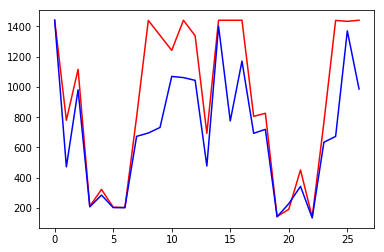

In [51]:
# 绘制所有节点上的
import matplotlib.pyplot as plt
plt.plot(ave_time[0,:],color = 'r')
plt.plot(ave_time[1,:],color = 'b')
plt.show()
# 达到目的，已经找到期望目标损失最小路径

In [32]:
ave_time.shape[1]

27

In [33]:
print(sum(ave_time[0,:]))

21365.6168148


In [34]:
print(len(p_result.drop_duplicates(['id','day'])))
print(len(n_result.drop_duplicates(['id','day'])))
print(len(co_list))

29
27
27


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


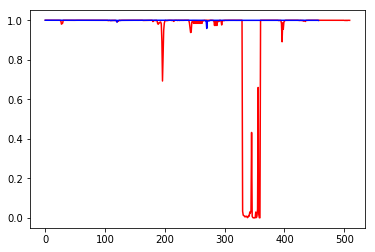

In [59]:
# 双路径核验
i = 26
cityid = co_list[i][0]
day = co_list[i][1]
temp_p = p_result[(p_result.id==cityid)&(p_result.day==day)]
temp_p.reset_index(inplace = True)
temp_p['weather'] = temp_p.apply(lambda x: weather_map[str(day-5)][str(int(x.time[0:2]))][x.xid-1][x.yid-1],axis = 1)
temp_n = n_result[(n_result.id==cityid)&(n_result.day==day)]
temp_n.reset_index(inplace = True)
temp_n['weather'] = temp_n.apply(lambda x: weather_map[str(day-5)][str(int(x.time[0:2]))][x.xid-1][x.yid-1],axis = 1)
plt.plot(temp_p.index,temp_p['weather'],color = 'r')
plt.plot(temp_n.index,temp_n['weather'],color = 'b')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


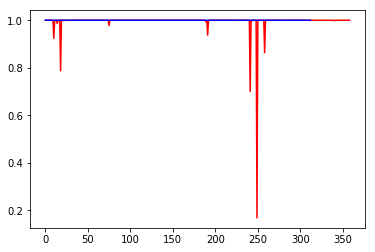

In [41]:
# 双路径核验
i = 18
cityid = co_list[i][0]
day = co_list[i][1]
temp_p = p_result[(p_result.id==cityid)&(p_result.day==day)]
temp_p.reset_index(inplace = True)
temp_p['weather'] = temp_p.apply(lambda x: weather_map[str(day-5)][str(int(x.time[0:2]))][x.xid-1][x.yid-1],axis = 1)
temp_n = n_result[(n_result.id==cityid)&(n_result.day==day)]
temp_n.reset_index(inplace = True)
temp_n['weather'] = temp_n.apply(lambda x: weather_map[str(day-5)][str(int(x.time[0:2]))][x.xid-1][x.yid-1],axis = 1)
plt.plot(temp_p.index,temp_p['weather'],color = 'r')
plt.plot(temp_n.index,temp_n['weather'],color = 'b')
plt.show()

In [22]:
temp_n

,index,id,day,time,xid,yid,weather
0,284,3,6,03:00,142,328,0.995092
1,285,3,6,03:02,141,328,0.995037
2,286,3,6,03:04,140,328,0.997282
3,287,3,6,03:06,140,327,0.997522
4,288,3,6,03:08,140,326,0.998117
5,289,3,6,03:10,140,325,0.998450
6,290,3,6,03:12,140,324,0.998619
7,291,3,6,03:14,140,323,0.998651
8,292,3,6,03:16,140,322,0.998620
9,293,3,6,03:18,140,321,0.998573


In [23]:
#file_weather = open('weather_online_output_1227_h_p.pkl', 'rb')
import pandas as pd
x = 140 - 1
y = 275 - 1
h = 5
count = 548*421*(h-3)+x*421+y
latest = pd.read_csv('layer3_X_front.csv',header=None)


In [3]:
len(latest.columns)

148

In [25]:
i = 0
for h in range(3,21):
    for x in range(548):
        for y in range(421):
            if (h,x,y) == (5,139,248):
                count = i
                print(i)
            i += 1

520183


In [59]:
data = latest.iloc[count,1:]

In [63]:
list(data)[131]

16.100000000000001

In [29]:
import xgboost as xgb
model_2 = xgb.Booster({'nthread':7}) #init model
#model_2.load_model('layer_2_model-2.model')
model_2.load_model('model_1_0.model')
y_front = model_2.predict(xgb.DMatrix(data))

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
model_2 = xgb.Booster({'nthread':7}) #init model
#model_2.load_model('layer_2_model-2.model')
model_2.load_model('model_1_0.model')

In [65]:
sorted(model_2.get_score().items(),key=lambda x:x[1])

[('f38', 315790),
 ('f24', 331168),
 ('f10', 390485),
 ('f40', 502959),
 ('f41', 505088),
 ('f26', 530359),
 ('f27', 555311),
 ('f12', 583842),
 ('f13', 636823),
 ('f42', 768276),
 ('f37', 806133),
 ('f36', 829103),
 ('f35', 851976),
 ('f33', 860650),
 ('f34', 868335),
 ('f31', 876166),
 ('f29', 883443),
 ('f32', 885968),
 ('f30', 900824),
 ('f28', 901823),
 ('f23', 920313),
 ('f22', 926233),
 ('f21', 947318),
 ('f19', 971240),
 ('f20', 978428),
 ('f17', 1009075),
 ('f18', 1016608),
 ('f15', 1054704),
 ('f16', 1067164),
 ('f14', 1141769),
 ('f9', 1232781),
 ('f8', 1270848),
 ('f7', 1328024),
 ('f6', 1427974),
 ('f39', 1515428),
 ('f5', 1520051),
 ('f25', 1659554),
 ('f4', 1693190),
 ('f3', 1917707),
 ('f11', 2050257),
 ('f2', 2349550),
 ('f1', 2900764),
 ('f0', 5298893)]

In [67]:
model_2 = xgb.Booster({'nthread':7}) #init model
#model_2.load_model('layer_2_model-2.model')
model_2.load_model('layer_2_model-1.model')
sorted(model_2.get_score().items(),key=lambda x:x[1])

[('f142', 3403),
 ('f11', 4481),
 ('f17', 5308),
 ('f5', 5387),
 ('f9', 5837),
 ('f3', 6023),
 ('f139', 6369),
 ('f15', 6474),
 ('f144', 6887),
 ('f6', 7014),
 ('f146', 7537),
 ('f143', 8807),
 ('f23', 15270),
 ('f29', 15808),
 ('f12', 16115),
 ('f145', 16609),
 ('f30', 17315),
 ('f147', 18165),
 ('f48', 18173),
 ('f18', 18399),
 ('f35', 18549),
 ('f36', 19637),
 ('f54', 20236),
 ('f24', 21182),
 ('f10', 23169),
 ('f66', 23489),
 ('f130', 23813),
 ('f8', 24011),
 ('f83', 24117),
 ('f41', 24512),
 ('f72', 24729),
 ('f27', 24939),
 ('f16', 25126),
 ('f44', 25913),
 ('f47', 25945),
 ('f33', 26575),
 ('f42', 26595),
 ('f26', 27007),
 ('f14', 27283),
 ('f50', 27446),
 ('f116', 27935),
 ('f13', 29143),
 ('f32', 29402),
 ('f62', 29525),
 ('f53', 29775),
 ('f89', 29994),
 ('f4', 30109),
 ('f68', 30548),
 ('f21', 30632),
 ('f2', 31599),
 ('f31', 32157),
 ('f28', 32358),
 ('f49', 32377),
 ('f7', 32457),
 ('f19', 33287),
 ('f34', 34344),
 ('f60', 34359),
 ('f55', 34687),
 ('f46', 35719),
 ('f67',

In [43]:
weather_map['1']['5'][139][274]

0.06573486328125

In [44]:
weather_map['1']['3'][0][0]

0.401123046875

In [45]:
model_2.predict(xgb.DMatrix(latest.iloc[0,:]))

array([ 0.99881929], dtype=float32)

In [ ]:
latest.iloc[0,:]